## In-stream Bacteria Prediction Project
### Spatially Lumped Dynamic Model (SLDM)
#### Date:  01/17/2022


In [26]:
# Importing relevatnt packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [10,8] #Default figure size

In [39]:
# Load dataset from csv file
temp = pd.read_csv(r"D:/A_DataCleaning/SLDM/ws1_all.csv")

In [40]:
temp.dtypes
temp.describe()
#result is bacteria data

,depth,result,season,ppt__mm_,ADD,RD1,RD2,RD3,RD4,RD5,...,DOS,DLI,DMI,DHI.1,Barren,Forest,Grass,Pas,Crp,Wtlnd
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,...,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.513305,1807.381974,2.497854,3.192961,3.064378,3.336738,3.371502,4.569657,3.055837,3.498026,...,12.741416,7.792275,5.941502,0.763648,0.176996,4.854163,2.215708,37.937811,3.055322,22.522961
std,0.486515,2802.729045,1.126195,7.505076,4.301180,8.473358,10.999842,10.488017,8.103319,9.930664,...,1.611506,1.474847,1.856727,0.286794,0.025419,0.403673,0.157782,4.624994,0.345627,0.592234
min,0.050000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,6.300000,3.780000,0.470000,0.150000,4.150000,2.050000,28.410000,2.080000,21.280000
25%,0.250000,680.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,6.300000,3.780000,0.470000,0.160000,4.390000,2.050000,34.300000,3.040000,22.040000
50%,0.350000,1000.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.230000,7.560000,6.010000,0.690000,0.160000,4.840000,2.230000,38.510000,3.220000,22.610000
75%,0.500000,1600.000000,4.000000,1.910000,4.000000,2.120000,1.830000,3.080000,1.760000,2.040000,...,13.330000,8.850000,7.650000,1.040000,0.210000,5.390000,2.260000,42.890000,3.250000,23.130000
max,3.500000,20000.000000,4.000000,50.040000,19.000000,64.270000,123.110000,59.140000,72.980000,100.690000,...,17.000000,11.000000,9.050000,1.300000,0.210000,5.390000,2.530000,42.890000,3.300000,23.150000


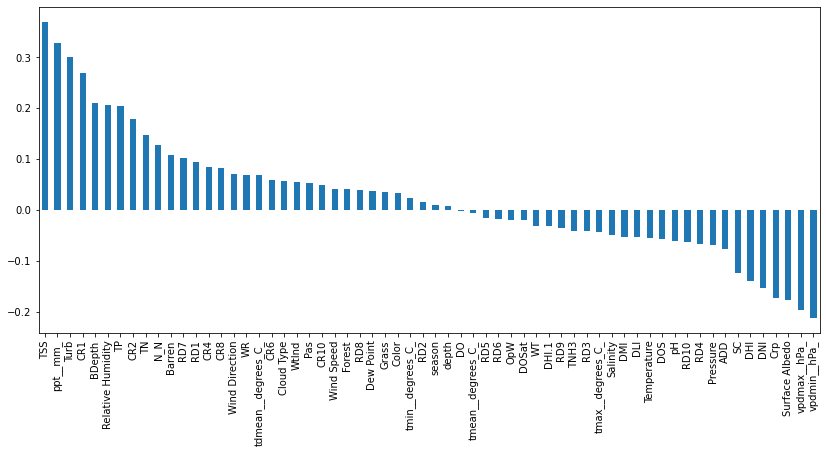

In [41]:
# Visualize correlation (linear relationship) between target and predictors

corr = temp.corr()["result"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr.drop("result",).plot.bar()
plt.show();


In [45]:
# Filling missing values with the Mean
BFC1 = temp
BFC1['Turb'].fillna(value=BFC1['Turb'].mean(), inplace=True)
BFC1['TSS'].fillna(value=BFC1['TSS'].mean(), inplace=True)
BFC1['TNH3'].fillna(value=BFC1['TNH3'].mean(), inplace=True)
BFC1['WT'].fillna(value=BFC1['WT'].mean(), inplace=True)
BFC1['SC'].fillna(value=BFC1['SC'].mean(), inplace=True)
BFC1['Salinity'].fillna(value=BFC1['Salinity'].mean(), inplace=True)
BFC1['pH'].fillna(value=BFC1['pH'].mean(), inplace=True)
BFC1['TP'].fillna(value=BFC1['TP'].mean(), inplace=True)
BFC1['TN'].fillna(value=BFC1['TN'].mean(), inplace=True)
BFC1['N_N'].fillna(value=BFC1['N_N'].mean(), inplace=True)
BFC1['DOSat'].fillna(value=BFC1['DOSat'].mean(), inplace=True)
BFC1['DO'].fillna(value=BFC1['DO'].mean(), inplace=True)
BFC1['Color'].fillna(value=BFC1['Color'].mean(), inplace=True)
BFC1['BDepth'].fillna(value=BFC1['BDepth'].mean(), inplace=True)

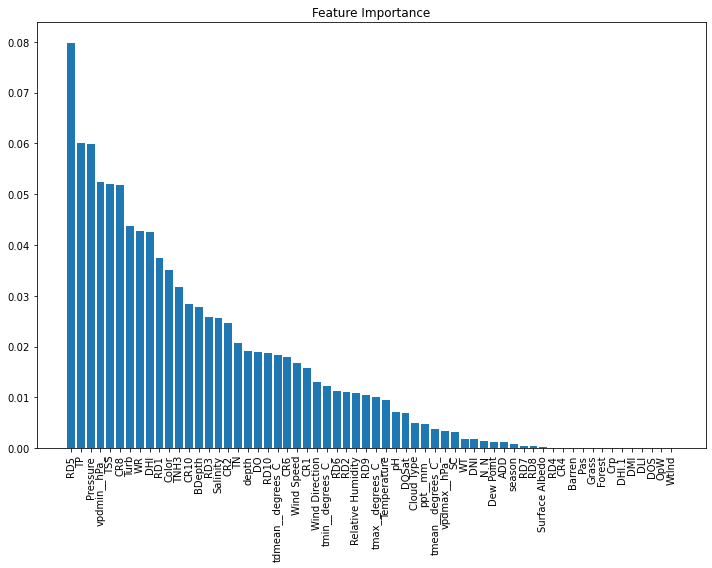

In [71]:
# Random forest feature importance (All types of relationship




rain_corr = pd.read_csv(r"D:/A_DataCleaning/SLDM/ws1_all.csv")
rain_corr = rain_corr.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

from sklearn.ensemble import RandomForestRegressor as rf
forest = rf()
X_rf = rain_corr.drop("result", axis=1)
y_rf = rain_corr['result'].values


forest.fit(X_rf, y_rf)
importances = forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(X_rf.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_rf.shape[1]), X_rf.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [51]:
# Separate Target from predictors

X = temp.drop("result", axis = 1).values #predictors
y = temp['result'].values   #response
y = np.log(y) #Log transformation of Y

In [11]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size = 0.1, 
                                               random_state=42)


In [16]:
# Import packages for models

from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ExpSineSquared
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.svm import NuSVR
from sklearn.neighbors import RadiusNeighborsRegressor

In [19]:
# Instantiate models

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
xgb = XGBRegressor()
#rrf = rf(n_estimators = 1000, random_state = 1234)
rrf = rf(random_state = 1234)
lrr = lr()
et = ExtraTreesRegressor(n_estimators=1000, n_jobs=-1, random_state=1234)
las = lm.Lasso()
knn =KNeighborsRegressor(n_neighbors=10)
rncr =RANSACRegressor()
tsr = TheilSenRegressor()
hr = HuberRegressor()
dtr = DecisionTreeRegressor()
en = ElasticNet()
gpr = GaussianProcessRegressor()
mlpr = MLPRegressor( max_iter=500)
br = lm.BayesianRidge()
omp = OrthogonalMatchingPursuit(normalize=True)
adr = lm.ARDRegression()
sdg = SGDRegressor(max_iter=1000, tol=1e-3)
par = PassiveAggressiveRegressor(max_iter=100)
nusvr = NuSVR(C=1.0, nu=0.1)
rnr = RadiusNeighborsRegressor(radius=1.0)

In [20]:
# Choose model
model =rrf

In [21]:
# Fit model to data
modfit = model.fit(X_train, y_train)

In [22]:
#Predict training data
y_train_pred = modfit.predict(X_train)

In [27]:
# Model performance
r_sq_noscaler = modfit.score(X_train, y_train)
rsq_train_noscaler =r2_score(y_train, y_train_pred)

print("R-squared for training dataset:{}".
      format(np.round(modfit.score(X_train,  y_train),
                      2)))

print("Root mean square error: {}".
      format(np.round(np.sqrt(mean_squared_error(y_train, 
                                        y_train_pred)), 2)))


R-squared for training dataset:0.38
Root mean square error: 0.73


In [29]:
import hydroeval as he
import hydrostats.metrics as hm

In [30]:
# Nash-Sutcliffe (nse)
#(simulations, evaluations)

nse_train_noscaling = he.evaluator(he.nse, y_train_pred,  y_train)

# Original Kling-Gupta Efficiency (kge)
kge_train_noscaling, r, alpha, beta = he.evaluator(he.kge, y_train_pred, y_train)

# Modified Kling-Gupta Efficiency (kgeprime)
kgeprime_train_noscaling, r, gamma, beta = he.evaluator(he.kgeprime,  y_train_pred, y_train)

# Non-Parametric Kling-Gupta Efficiency (kgenp)
kgenp_train_noscaling, r, alpha, beta = he.evaluator(he.kgenp,  y_train_pred, y_train)

# Percent Bias (pbias)
pbias_train_noscaling = he.evaluator(he.pbias, y_train_pred, y_train) 

# Mean Absolute Relative Error (mare)
mare_train_noscaling = he.evaluator(he.mare, y_train_pred, y_train)

# Root Mean Square Error (rmse)
rmse_train_noscaling = he.evaluator(he.rmse, y_train_pred, y_train)

print(mare_train_noscaling)
print(rmse_train_noscaling)
print(nse_train_noscaling)
print(kge_train_noscaling)
print(pbias_train_noscaling)
print(kgeprime_train_noscaling)
print(kgenp_train_noscaling)


[0.0769899]
[0.73004443]
[0.38050508]
[0.35188199]
[0.10018976]
[0.35226609]
[0.47555804]


In [31]:
#Predict using the test data
pred_noscale = modfit.predict(X_test)


In [32]:
#Evaluation of Test Data
r_sq_test_noscale = modfit.score(X_test, y_test)
rsq_test_noscale =r2_score(y_test, pred_noscale)


print("R-squared for test dataset:{}".
      format(np.round(modfit.score(X_test, 
                                       y_test),  2)))

print("Root mean square error for test dataset: {}".
      format(np.round(np.sqrt(mean_squared_error(y_test, 
                                        pred_noscale)), 2)))

R-squared for test dataset:0.25
Root mean square error for test dataset: 0.79


In [37]:

nse_test_noscaling = he.evaluator(he.nse, pred_noscale,  y_test)
# Original Kling-Gupta Efficiency (kge)
kge_test_noscaling, r, alpha, beta = he.evaluator(he.kge, pred_noscale, y_test)

# Modified Kling-Gupta Efficiency (kgeprime)
kgeprime_test_noscaling, r, gamma, beta = he.evaluator(he.kgeprime,  pred_noscale, y_test)

# Non-Parametric Kling-Gupta Efficiency (kgenp)
kgenp_test_noscaling, r, alpha, beta = he.evaluator(he.kgenp,  pred_noscale, y_test)

# Percent Bias (pbias)
pbias_test_noscaling = he.evaluator(he.pbias, pred_noscale, y_test) 

# Mean Absolute Relative Error (mare)
mare_test_noscaling = he.evaluator(he.mare, pred_noscale, y_test)

# Root Mean Square Error (rmse)
rmse_test_noscaling = he.evaluator(he.rmse, pred_noscale, y_test)



In [36]:
#print(mare_test_noscaling)
#print(rmse_test_noscaling)
print(nse_test_noscaling)
print(kge_test_noscaling)
print(pbias_test_noscaling)
print(kgeprime_test_noscaling)
print(kgenp_test_noscaling)


[0.24633192]
[0.23820553]
[3.54427471]
[0.24851435]
[0.07694908]
